In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, max_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Lista de las columnas que quieres seleccionar
columnas_a_cargar = ['SDT', 'pH_CAMPO', 'OD_%', 'TEMP_AMB', 'TEMP_AGUA', 'N_TOT']  # Cambia los nombres según tus columnas

# Lee el archivo CSV y lo convierte en un DataFrame
df = pd.read_csv('C:\\Users\\Alienware X15\\Desktop\\tesis\\BDreconstruccion\\BDWeka\\BDentrenamientoWeka.csv', usecols=columnas_a_cargar)

# Muestra las primeras filas del DataFrame para verificar que se ha cargado correctamente
print(df.head())


    N_TOT       SDT  pH_CAMPO   OD_%  TEMP_AMB  TEMP_AGUA
0  0.0095  51280.00      8.06  100.1     32.10      29.10
1  0.0193  30189.60      6.48   64.3     29.30      29.72
2  0.0224    161.92      8.68  139.4     28.81      30.63
3  0.0464  37600.00      8.09  104.4     25.40      21.20
4  0.0511    318.72      8.13   80.8     25.36      25.32


In [3]:
# -------------------------
# IDENTIFICAR Y ELIMINAR OUTLIERS EN LA COLUMNA P_TOT USANDO IQR
# -------------------------
# Calcular el rango intercuartílico (IQR)
Q1 = df['N_TOT'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df['N_TOT'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar y eliminar outliers
df_sin_outliers = df[~((df['N_TOT'] < lower_bound) | (df['N_TOT'] > upper_bound))]

# Mostrar la cantidad de filas originales y el nuevo DataFrame sin outliers
print(f'Número de filas originales: {df.shape[0]}')
print(f'Número de filas después de eliminar outliers: {df_sin_outliers.shape[0]}')

# Mostrar las primeras filas del nuevo DataFrame sin outliers
print(df_sin_outliers.head())

Número de filas originales: 3052
Número de filas después de eliminar outliers: 2645
    N_TOT       SDT  pH_CAMPO   OD_%  TEMP_AMB  TEMP_AGUA
0  0.0095  51280.00      8.06  100.1     32.10      29.10
1  0.0193  30189.60      6.48   64.3     29.30      29.72
2  0.0224    161.92      8.68  139.4     28.81      30.63
3  0.0464  37600.00      8.09  104.4     25.40      21.20
4  0.0511    318.72      8.13   80.8     25.36      25.32


In [4]:
# Para evitar problemas con valores negativos o cero, sumamos 1 a todo el dataset
df_sin_outliers_log = np.log(df_sin_outliers + 1)

# Mostrar las primeras filas del DataFrame transformado
print(df_sin_outliers_log.head())

      N_TOT        SDT  pH_CAMPO      OD_%  TEMP_AMB  TEMP_AGUA
0  0.009455  10.845076  2.203869  4.616110  3.499533   3.404525
1  0.019116  10.315286  2.012233  4.178992  3.411148   3.424914
2  0.022153   5.093259  2.270062  4.944495  3.394844   3.454106
3  0.045356  10.534786  2.207175  4.657763  3.273364   3.100092
4  0.049837   5.767446  2.211566  4.404277  3.271848   3.270329


In [7]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Crear una copia del DataFrame para aplicar la normalización
df_normalizado = df_sin_outliers_log.copy()

# Normalizar las columnas específicas del DataFrame
df_normalizado['OD_%'] = scaler.fit_transform(df_normalizado[['OD_%']])
df_normalizado['N_TOT'] = scaler.fit_transform(df_normalizado[['N_TOT']])
df_normalizado['SDT'] = scaler.fit_transform(df_normalizado[['SDT']])
df_normalizado['TEMP_AGUA'] = scaler.fit_transform(df_normalizado[['TEMP_AGUA']])
df_normalizado['TEMP_AMB'] = scaler.fit_transform(df_normalizado[['TEMP_AMB']])
df_normalizado['pH_CAMPO'] = scaler.fit_transform(df_normalizado[['pH_CAMPO']])


# Guardar el DataFrame normalizado en un archivo Excel
df_normalizado.to_excel('df_normalizado.xlsx', index=False)

# Mostrar las primeras filas del DataFrame normalizado
print(df_normalizado.head())



      N_TOT       SDT  pH_CAMPO      OD_%  TEMP_AMB  TEMP_AGUA
0  0.000000  1.000000  0.551469  0.669759  0.738129   0.695471
1  0.005306  0.925630  0.062191  0.455639  0.665385   0.723050
2  0.006974  0.192583  0.720469  0.830617  0.651967   0.762536
3  0.019718  0.956443  0.559909  0.690162  0.551985   0.283679
4  0.022179  0.287223  0.571119  0.565993  0.550737   0.513950


X_train_scaled shape: (2116, 5)
X_test_scaled shape: (529, 5)
y_train shape: (2116,)
y_test shape: (529,)
Error Cuadrático Medio en Entrenamiento: 0.009367142207667552
Error Cuadrático Medio en Prueba: 0.029712129377453076
Error Absoluto Máximo en Entrenamiento: 0.4619167465801943
Error Absoluto Máximo en Prueba: 0.6325551302333123


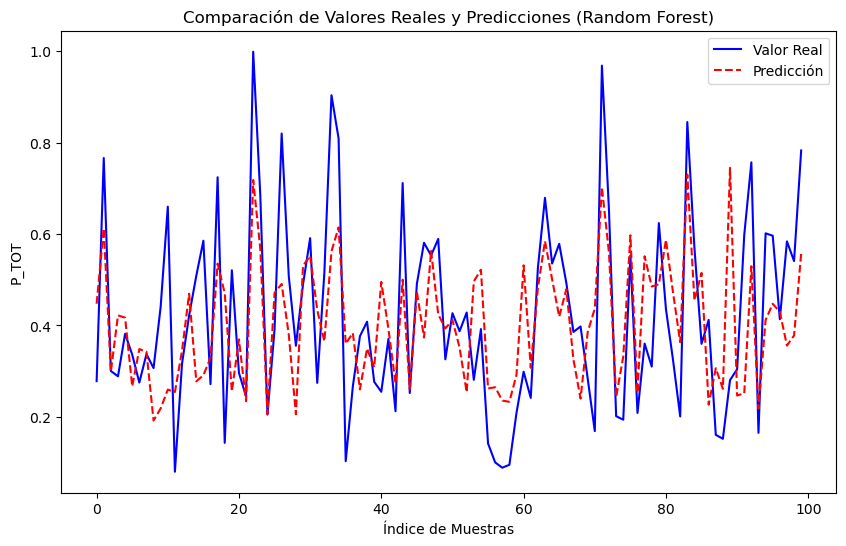

In [9]:
# Asignar las variables de entrada (X) y la variable de salida (y)
X = df_normalizado.drop(columns=['N_TOT'])  # Todas las columnas excepto 'P_TOT'
y = df_normalizado['N_TOT']  # La columna 'P_TOT' como variable de salida

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Asegurarse de que las etiquetas sean arrays unidimensionales
y_train = y_train.values
y_test = y_test.values

# Verificar las formas
print("X_train_scaled shape:", X_train.shape)
print("X_test_scaled shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Definir el modelo Random Forest ajustando hiperparámetros
rf = RandomForestRegressor(n_estimators=983, 
                           max_depth=15, 
                           min_samples_split=3, 
                           min_samples_leaf=2, 
                           max_features='sqrt', 
                           random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluar el modelo (usando el error cuadrático medio)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Error Cuadrático Medio en Entrenamiento: {mse_train}')
print(f'Error Cuadrático Medio en Prueba: {mse_test}')

# Calcular el error absoluto máximo en el conjunto de entrenamiento y prueba
max_error_train = max_error(y_train, y_pred_train)
max_error_test = max_error(y_test, y_pred_test)

print(f'Error Absoluto Máximo en Entrenamiento: {max_error_train}')
print(f'Error Absoluto Máximo en Prueba: {max_error_test}')

# Visualización de las predicciones versus los valores verdaderos
plt.figure(figsize=(10, 6))
plt.plot(y_test[0:100], label='Valor Real', color='blue')
plt.plot(y_pred_test[0:100], label='Predicción', color='red', linestyle='--')
plt.legend()
plt.xlabel('Índice de Muestras')
plt.ylabel('P_TOT')
plt.title('Comparación de Valores Reales y Predicciones (Random Forest)')
plt.show()


In [32]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Supongamos que ya tienes X_train, y_train, X_test, y_test

# Definir los rangos de los hiperparámetros
HYPERPARAMS = {
    'max_depth': (2, 20),  # Rango de la profundidad máxima
    'min_samples_split': (2, 20),  # Rango de muestras para dividir
    'min_samples_leaf': (1, 20),  # Rango de muestras en una hoja
    'max_features': ['sqrt', 'log2']  # Tipos de selección de características
}

# Crear el esquema del problema genético
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimizar el MSE
creator.create("Individual", list, fitness=creator.FitnessMin)

# Función de evaluación del Random Forest
def evaluar(individual):
    max_depth = int(individual[0])
    min_samples_split = int(individual[1])
    min_samples_leaf = int(individual[2])
    
    # Convertir el índice de max_features al valor correspondiente ('sqrt' o 'log2')
    max_features = HYPERPARAMS['max_features'][int(individual[3])]

    # Crear y entrenar el modelo
    rf = RandomForestRegressor(
        n_estimators=500,  # Número fijo de estimadores
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    rf.fit(X_train, y_train)
    
    # Realizar predicciones y calcular el MSE
    y_pred_test = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    
    return (mse,)  # Retornar una tupla para DEAP

# Inicializar el toolbox
toolbox = base.Toolbox()

# Definir atributos (hiperparámetros)
toolbox.register("attr_max_depth", random.randint, HYPERPARAMS['max_depth'][0], HYPERPARAMS['max_depth'][1])
toolbox.register("attr_min_samples_split", random.randint, HYPERPARAMS['min_samples_split'][0], HYPERPARAMS['min_samples_split'][1])
toolbox.register("attr_min_samples_leaf", random.randint, HYPERPARAMS['min_samples_leaf'][0], HYPERPARAMS['min_samples_leaf'][1])
toolbox.register("attr_max_features", random.randint, 0, len(HYPERPARAMS['max_features']) - 1)

# Definir el individuo (combinación de hiperparámetros)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_max_depth, toolbox.attr_min_samples_split,
                  toolbox.attr_min_samples_leaf, toolbox.attr_max_features), n=1)

# Definir la población
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definir los operadores genéticos: cruzamiento, mutación, selección
toolbox.register("mate", tools.cxTwoPoint)

# Aquí agregamos la mutación corregida con 4 elementos (uno para cada hiperparámetro)
toolbox.register("mutate", tools.mutUniformInt,
                 low=[HYPERPARAMS['max_depth'][0], HYPERPARAMS['min_samples_split'][0], HYPERPARAMS['min_samples_leaf'][0], 0], 
                 up=[HYPERPARAMS['max_depth'][1], HYPERPARAMS['min_samples_split'][1], HYPERPARAMS['min_samples_leaf'][1], len(HYPERPARAMS['max_features']) - 1], 
                 indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluar)

# Crear la población inicial
TAMAÑO_POBLACIÓN = 10
GENERACIONES = 6

población = toolbox.population(n=TAMAÑO_POBLACIÓN)

# Ejecutar el algoritmo genético
for gen in range(GENERACIONES):
    print(f"Generación {gen + 1}")
    
    # Evaluar a los individuos
    fitnesses = list(map(toolbox.evaluate, población))
    for ind, fit in zip(población, fitnesses):
        ind.fitness.values = fit

    # Seleccionar los mejores individuos y aplicar cruce/mutación
    descendencia = toolbox.select(población, len(población))
    descendencia = list(map(toolbox.clone, descendencia))

    # Aplicar cruce y mutación
    for child1, child2 in zip(descendencia[::2], descendencia[1::2]):
        if random.random() < 0.5:  # Probabilidad de cruce
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in descendencia:
        if random.random() < 0.2:  # Probabilidad de mutación
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Reemplazar la población por la descendencia
    población[:] = descendencia

# Obtener el mejor individuo (mejores hiperparámetros)
mejor_individuo = tools.selBest(población, k=1)[0]
print(f"Mejores hiperparámetros: {mejor_individuo}")

# Evaluar el mejor individuo
mejor_mse = evaluar(mejor_individuo)[0]
print(f"Mejor MSE obtenido: {mejor_mse}")


c:\Users\Alienware X15\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Alienware X15\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generación 1
Generación 2
Generación 3
Generación 4
Generación 5
Generación 6
Mejores hiperparámetros: [15, 9, 1, 1]
Mejor MSE obtenido: 0.02993487668261577


In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Supongamos que ya tienes X_train, y_train, X_test, y_test

# Definir los rangos de los hiperparámetros
HYPERPARAMS = {
    'max_depth': (2, 1000),  # Rango de la profundidad máxima
    'min_samples_split': (2, 1000),  # Rango de muestras para dividir
    'min_samples_leaf': (1, 1000),  # Rango de muestras en una hoja
    'max_features': ['sqrt', 'log2'],  # Tipos de selección de características
    'n_estimators': (100, 10000)  # Rango para el número de estimadores
}

# Crear el esquema del problema genético
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimizar el MSE
creator.create("Individual", list, fitness=creator.FitnessMin)

# Función de evaluación del Random Forest
def evaluar(individual):
    max_depth = int(individual[0])
    min_samples_split = int(individual[1])
    min_samples_leaf = int(individual[2])
    
    # Convertir el índice de max_features al valor correspondiente ('sqrt' o 'log2')
    max_features = HYPERPARAMS['max_features'][int(individual[3])]
    
    # Extraer n_estimators del individuo
    n_estimators = int(individual[4])

    # Crear y entrenar el modelo
    rf = RandomForestRegressor(
        n_estimators=n_estimators,  # Ahora el número de estimadores es dinámico
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    rf.fit(X_train, y_train)
    
    # Realizar predicciones y calcular el MSE
    y_pred_test = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    
    return (mse,)  # Retornar una tupla para DEAP

# Inicializar el toolbox
toolbox = base.Toolbox()

# Definir atributos (hiperparámetros)
toolbox.register("attr_max_depth", random.randint, HYPERPARAMS['max_depth'][0], HYPERPARAMS['max_depth'][1])
toolbox.register("attr_min_samples_split", random.randint, HYPERPARAMS['min_samples_split'][0], HYPERPARAMS['min_samples_split'][1])
toolbox.register("attr_min_samples_leaf", random.randint, HYPERPARAMS['min_samples_leaf'][0], HYPERPARAMS['min_samples_leaf'][1])
toolbox.register("attr_max_features", random.randint, 0, len(HYPERPARAMS['max_features']) - 1)
toolbox.register("attr_n_estimators", random.randint, HYPERPARAMS['n_estimators'][0], HYPERPARAMS['n_estimators'][1])

# Definir el individuo (combinación de hiperparámetros)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_max_depth, toolbox.attr_min_samples_split,
                  toolbox.attr_min_samples_leaf, toolbox.attr_max_features, toolbox.attr_n_estimators), n=1)

# Definir la población
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definir los operadores genéticos: cruzamiento, mutación, selección
toolbox.register("mate", tools.cxTwoPoint)

# Aquí agregamos la mutación corregida con 5 elementos (uno para cada hiperparámetro)
toolbox.register("mutate", tools.mutUniformInt,
                 low=[HYPERPARAMS['max_depth'][0], HYPERPARAMS['min_samples_split'][0], HYPERPARAMS['min_samples_leaf'][0], 0, HYPERPARAMS['n_estimators'][0]], 
                 up=[HYPERPARAMS['max_depth'][1], HYPERPARAMS['min_samples_split'][1], HYPERPARAMS['min_samples_leaf'][1], len(HYPERPARAMS['max_features']) - 1, HYPERPARAMS['n_estimators'][1]], 
                 indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("evaluate", evaluar)

# Crear la población inicial
TAMAÑO_POBLACIÓN =60
GENERACIONES = 200

población = toolbox.population(n=TAMAÑO_POBLACIÓN)

# Ejecutar el algoritmo genético
for gen in range(GENERACIONES):
    print(f"Generación {gen + 1}")
    
    # Evaluar a los individuos
    fitnesses = list(map(toolbox.evaluate, población))
    for ind, fit in zip(población, fitnesses):
        ind.fitness.values = fit

    # Seleccionar los mejores individuos y aplicar cruce/mutación
    descendencia = toolbox.select(población, len(población))
    descendencia = list(map(toolbox.clone, descendencia))

    # Aplicar cruce y mutación
    for child1, child2 in zip(descendencia[::2], descendencia[1::2]):
        if random.random() < 0.5:  # Probabilidad de cruce
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in descendencia:
        if random.random() < 0.2:  # Probabilidad de mutación
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Reemplazar la población por la descendencia
    población[:] = descendencia

# Obtener el mejor individuo (mejores hiperparámetros)
mejor_individuo = tools.selBest(población, k=1)[0]
print(f"Mejores hiperparámetros: {mejor_individuo}")

# Evaluar el mejor individuo
mejor_mse = evaluar(mejor_individuo)[0]
print(f"Mejor MSE obtenido: {mejor_mse}")


Generación 1
Generación 2
Generación 3
Generación 4
Generación 5
Generación 6
Generación 7
Generación 8
Generación 9
Generación 10
Generación 11
Generación 12
Generación 13
Generación 14
Generación 15
Generación 16
Generación 17
Generación 18
Generación 19
Generación 20
Generación 21
Generación 22
Generación 23
Generación 24
Generación 25
Generación 26
Generación 27
Generación 28
Generación 29
Generación 30
Generación 31
Generación 32
Generación 33
Generación 34
Generación 35
Generación 36
Generación 37
Generación 38
Generación 39
Generación 40
Generación 41
Generación 42
Generación 43
Generación 44
Generación 45
Generación 46
Generación 47
Generación 48
Generación 49
Generación 50
Generación 51
Generación 52
Generación 53
Generación 54
Generación 55
Generación 56
Generación 57
Generación 58
Generación 59
Generación 60
Generación 61
Generación 62
Generación 63
Generación 64
Generación 65
Generación 66
Generación 67
Generación 68
Generación 69
Generación 70
Generación 71
Generación 72
G